In [1]:
import sys
import os
import matplotlib.pyplot as plt
import cv2

# Adding the src directory to the Python path
sys.path.append(os.path.abspath('../src'))
from utils import load_image, get_image_histogram, display_image, display_histogram
from data_exploration import get_avgrage_width_and_lenght , get_image_intensity_statistics, print_intensity_statistics, get_sifit_image, get_harris_corners_image, get_orb_image

In [2]:
# Setting up variables
root_directory = '../datasets/grayscaled/'
class_names = ['Normal', 'Pneumonia']
image = load_image(root_directory+'Normal/IM-0001-0001.jpeg')
# Applying Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
# Ensure the blurred image is of type CV_8UC1
blurred_image_float = blurred_image.astype('float32')


In [ ]:
# Displaying an image
display_image(image, 'Random Image', 'x', 'y')

In [ ]:
# Calculating the image intensity histogram
hist = get_image_histogram(image)

# Ploting the image intensity histogram
display_histogram(hist, 'Histogram of Pixel Intensities', 'black', 'Pixel Intensity', 'Frequency')

In [ ]:
# Calculating intensity statistical measures
mean_intensity, std_intensity , median_intensity = get_image_intensity_statistics(image)

# Printing intensity measures
print_intensity_statistics(mean_intensity, std_intensity, median_intensity)

In [ ]:
# Simpling thresholding
_, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# displaying thresholded image
display_image(thresholded_image, 'Thresholded Image', 'x', 'y')

In [ ]:
# Calculating the avrage image dimensions
avreage_lenght, avrage_width = get_avgrage_width_and_lenght(root_directory, class_names)
print( str(int(avreage_lenght))+"  x  "+str(int(avrage_width)))

In [ ]:
# Applying Canny edge detection
edges = cv2.Canny(blurred_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

In [ ]:
# Detect Harris corners
corner_image = get_harris_corners_image(blurred_image_float, image)

# Displaying the haris corners image
display_image(corner_image, 'Harris Corner Detection', 'x', 'y', cmap='gray')


In [ ]:
# Getting the sift image
sift_image = get_sifit_image(blurred_image)

# Displaying the sift image
display_image(sift_image, 'SIFT Keypoints', 'x', 'y', cmap='gray')


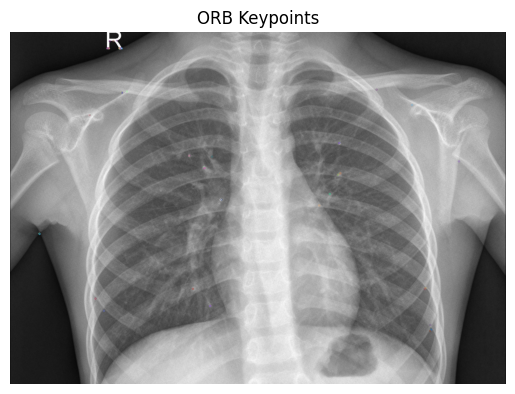

In [3]:
#  Getting the ORB image
orb_image = get_orb_image(blurred_image, image)
# orb = cv2.ORB_create()
# keypoints_orb, descriptors_orb = orb.detectAndCompute(blurred_image, None)
# orb_image = cv2.drawKeypoints(image, keypoints_orb, None)

# Displaying the ORB image
display_image(orb_image, 'ORB Keypoints','','')

In [ ]:
#Clustering and Dimensionality Reduction:
# Apply clustering algorithms (e.g., K-means) to group similar images.
